## Data Visualisation

In [1]:
import requests as r
import numpy as np
import pandas as pd
import json
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
import plotly.graph_objects as go
plt.style.use('fivethirtyeight') 

In [2]:
frauddata = pd.read_csv('fraudTrain.csv',index_col=0)
frauddata

trans_date_trans_time               cc_num  \
0         2019-01-01 00:00:18     2703186189652095   
1         2019-01-01 00:00:44         630423337322   
2         2019-01-01 00:00:51       38859492057661   
3         2019-01-01 00:01:16     3534093764340240   
4         2019-01-01 00:03:06      375534208663984   
...                       ...                  ...   
1296670   2020-06-21 12:12:08       30263540414123   
1296671   2020-06-21 12:12:19     6011149206456997   
1296672   2020-06-21 12:12:32     3514865930894695   
1296673   2020-06-21 12:13:36     2720012583106919   
1296674   2020-06-21 12:13:37  4292902571056973207   

                                    merchant       category     amt  \
0                 fraud_Rippin, Kub and Mann       misc_net    4.97   
1            fraud_Heller, Gutmann and Zieme    grocery_pos  107.23   
2                       fraud_Lind-Buckridge  entertainment  220.11   
3         fraud_Kutch, Hermiston and Farrell  gas_transport   45.00   
4                        fraud_Keeling-Crist       misc_pos   41.96   
...                                      ...            ...     ...   
1296670                    fraud_Reichel Inc  entertainment   15.56   
1296671             fraud_Abernathy and Sons    food_dining   51.70   
1296672                 fraud_Stiedemann Ltd    food_dining  105.93   
1296673  fraud_Reinger, Weissnat and Strosin    food_dining   74.90   
1296674  fraud_Langosh, Wintheiser and Hyatt    food_dining    4.30   

               first       last gender                         street  \
0           Jennifer      Banks      F                 561 Perry Cove   
1          Stephanie       Gill      F   43039 Riley Greens Suite 393   
2             Edward    Sanchez      M       594 White Dale Suite 530   
3             Jeremy      White      M    9443 Cynthia Court Apt. 038   
4              Tyler     Garcia      M               408 Bradley Rest   
...              ...        ...    ...                            ...   
1296670         Erik  Patterson      M       162 Jessica Row Apt. 072   
1296671      Jeffrey      White      M  8617 Holmes Terrace Suite 651   
1296672  Christopher  Castaneda      M     1632 Cohen Drive Suite 639   
1296673       Joseph     Murray      M           42933 Ryan Underpass   
1296674      Jeffrey      Smith      M           135 Joseph Mountains   

                             city  ...      lat      long  city_pop  \
0                  Moravian Falls  ...  36.0788  -81.1781      3495   
1                          Orient  ...  48.8878 -118.2105       149   
2                      Malad City  ...  42.1808 -112.2620      4154   
3                         Boulder  ...  46.2306 -112.1138      1939   
4                        Doe Hill  ...  38.4207  -79.4629        99   
...                           ...  ...      ...       ...       ...   
1296670                     Hatch  ...  37.7175 -112.4777       258   
1296671                 Tuscarora  ...  39.2667  -77.5101       100   
1296672  High Rolls Mountain Park  ...  32.9396 -105.8189       899   
1296673                 Manderson  ...  43.3526 -102.5411      1126   
1296674                      Sula  ...  45.8433 -113.8748       218   

                                       job         dob  \
0                Psychologist, counselling  1988-03-09   
1        Special educational needs teacher  1978-06-21   
2              Nature conservation officer  1962-01-19   
3                          Patent attorney  1967-01-12   
4           Dance movement psychotherapist  1986-03-28   
...                                    ...         ...   
1296670                       Geoscientist  1961-11-24   
1296671   Production assistant, television  1979-12-11   
1296672                    Naval architect  1967-08-30   
1296673              Volunteer coordinator  1980-08-18   
1296674           Therapist, horticultural  1995-08-16   

                                trans_num   unix_time  merch_lat  merch_long  \

In [3]:
frauddata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop          

### Checking fraud vs non-fraud cases


In [4]:
pie_df = pd.read_csv('fraudtrain.csv')
pie_org = pie_df.copy()

In [5]:
colors = ['blue', 'red']
labels = ['Non-Fraud','Fraud']
values = pie_df['is_fraud'].value_counts()/pie_df['is_fraud'].shape[0]
fig = go.Figure(data=[go.Pie(labels = labels,
                             values=values,hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='white', width=0.1)))
fig.update_layout(
    title_text="Credit Card Fraud",
    title_font_color="white",
    legend_title_font_color="yellow",
    paper_bgcolor="black",
    plot_bgcolor='black',
    font_color="white",
)
fig.show()

From here, we can see that there is a huge proportion of non-fraud cases to fraud cases. Thus, there is a need for us to consider oversampling or undersampling.

<br> For this case, we will isolate all the fraud and non-fraud cases separately to do our EDA, so as to obtain more meaningful insights from it.

In [6]:
#Isolating all fraud cases
is_frauddata = frauddata.loc[frauddata["is_fraud"] == 1]
is_frauddata

trans_date_trans_time            cc_num  \
2449      2019-01-02 01:06:37     4613314721966   
2472      2019-01-02 01:47:29   340187018810220   
2523      2019-01-02 03:05:23   340187018810220   
2546      2019-01-02 03:38:03     4613314721966   
2553      2019-01-02 03:55:47   340187018810220   
...                       ...               ...   
1295399   2020-06-21 01:00:08  3524574586339330   
1295491   2020-06-21 01:53:35  3524574586339330   
1295532   2020-06-21 02:16:56  4005676619255478   
1295666   2020-06-21 03:26:20  3560725013359375   
1295733   2020-06-21 03:59:46  4005676619255478   

                                     merchant       category      amt  \
2449                   fraud_Rutherford-Mertz    grocery_pos   281.06   
2472         fraud_Jenkins, Hauck and Friesen  gas_transport    11.52   
2523                   fraud_Goodwin-Nitzsche    grocery_pos   276.31   
2546                   fraud_Erdman-Kertzmann  gas_transport     7.03   
2553                       fraud_Koepp-Parker    grocery_pos   275.73   
...                                       ...            ...      ...   
1295399                    fraud_Kassulke PLC   shopping_net   977.01   
1295491                      fraud_Schumm PLC   shopping_net  1210.91   
1295532  fraud_Tillman, Dickinson and Labadie  gas_transport    10.24   
1295666                  fraud_Corwin-Collins  gas_transport    21.69   
1295733                   fraud_Koss and Sons  gas_transport    10.20   

           first     last gender                        street  \
2449       Jason   Murphy      M     542 Steve Curve Suite 011   
2472       Misty     Hart      F     27954 Hall Mill Suite 575   
2523       Misty     Hart      F     27954 Hall Mill Suite 575   
2546       Jason   Murphy      M     542 Steve Curve Suite 011   
2553       Misty     Hart      F     27954 Hall Mill Suite 575   
...          ...      ...    ...                           ...   
1295399   Ashley  Cabrera      F  94225 Smith Springs Apt. 617   
1295491   Ashley  Cabrera      F  94225 Smith Springs Apt. 617   
1295532  William    Perry      M  458 Phillips Island Apt. 768   
1295666   Brooke    Smith      F     63542 Luna Brook Apt. 012   
1295733  William    Perry      M  458 Phillips Island Apt. 768   

                   city  ...      lat      long  city_pop  \
2449      Collettsville  ...  35.9946  -81.7266       885   
2472        San Antonio  ...  29.4400  -98.4590   1595797   
2523        San Antonio  ...  29.4400  -98.4590   1595797   
2546      Collettsville  ...  35.9946  -81.7266       885   
2553        San Antonio  ...  29.4400  -98.4590   1595797   
...                 ...  ...      ...       ...       ...   
1295399      Vero Beach  ...  27.6330  -80.4031    105638   
1295491      Vero Beach  ...  27.6330  -80.4031    105638   
1295532  Denham Springs  ...  30.4590  -90.9027     71335   
1295666         Notrees  ...  31.8599 -102.7413        23   
1295733  Denham Springs  ...  30.4590  -90.9027     71335   

                              job         dob  \
2449               Soil scientist  1988-09-15   
2472     Horticultural consultant  1960-10-28   
2523     Horticultural consultant  1960-10-28   
2546               Soil scientist  1988-09-15   
2553     Horticultural consultant  1960-10-28   
...                           ...         ...   
1295399         Librarian, public  1986-05-07   
1295491         Librarian, public  1986-05-07   
1295532                 Herbalist  1994-05-31   
1295666            Cytogeneticist  1969-09-15   
1295733                 Herbalist  1994-05-31   

                                trans_num   unix_time  merch_lat  merch_long  \
2449     e8a81877ae9a0a7f883e15cb39dc4022  1325466397  36.430124  -81.179483   
2472     bc7d41c41103877b03232f03f1f8d3f5  1325468849  29.819364  -99.142791   
2523     b98f12f4168391b2203238813df5aa8c  1325473523  29.273085  -98.836360   
2546     397894a5c4c02e3c61c784001f0f14e4  1325475483  35.909292  -82.091010   
255

In [7]:
#Isolating all non-fraud cases
is_not_frauddata = frauddata.loc[frauddata["is_fraud"] == 0]
is_not_frauddata

trans_date_trans_time               cc_num  \
0         2019-01-01 00:00:18     2703186189652095   
1         2019-01-01 00:00:44         630423337322   
2         2019-01-01 00:00:51       38859492057661   
3         2019-01-01 00:01:16     3534093764340240   
4         2019-01-01 00:03:06      375534208663984   
...                       ...                  ...   
1296670   2020-06-21 12:12:08       30263540414123   
1296671   2020-06-21 12:12:19     6011149206456997   
1296672   2020-06-21 12:12:32     3514865930894695   
1296673   2020-06-21 12:13:36     2720012583106919   
1296674   2020-06-21 12:13:37  4292902571056973207   

                                    merchant       category     amt  \
0                 fraud_Rippin, Kub and Mann       misc_net    4.97   
1            fraud_Heller, Gutmann and Zieme    grocery_pos  107.23   
2                       fraud_Lind-Buckridge  entertainment  220.11   
3         fraud_Kutch, Hermiston and Farrell  gas_transport   45.00   
4                        fraud_Keeling-Crist       misc_pos   41.96   
...                                      ...            ...     ...   
1296670                    fraud_Reichel Inc  entertainment   15.56   
1296671             fraud_Abernathy and Sons    food_dining   51.70   
1296672                 fraud_Stiedemann Ltd    food_dining  105.93   
1296673  fraud_Reinger, Weissnat and Strosin    food_dining   74.90   
1296674  fraud_Langosh, Wintheiser and Hyatt    food_dining    4.30   

               first       last gender                         street  \
0           Jennifer      Banks      F                 561 Perry Cove   
1          Stephanie       Gill      F   43039 Riley Greens Suite 393   
2             Edward    Sanchez      M       594 White Dale Suite 530   
3             Jeremy      White      M    9443 Cynthia Court Apt. 038   
4              Tyler     Garcia      M               408 Bradley Rest   
...              ...        ...    ...                            ...   
1296670         Erik  Patterson      M       162 Jessica Row Apt. 072   
1296671      Jeffrey      White      M  8617 Holmes Terrace Suite 651   
1296672  Christopher  Castaneda      M     1632 Cohen Drive Suite 639   
1296673       Joseph     Murray      M           42933 Ryan Underpass   
1296674      Jeffrey      Smith      M           135 Joseph Mountains   

                             city  ...      lat      long  city_pop  \
0                  Moravian Falls  ...  36.0788  -81.1781      3495   
1                          Orient  ...  48.8878 -118.2105       149   
2                      Malad City  ...  42.1808 -112.2620      4154   
3                         Boulder  ...  46.2306 -112.1138      1939   
4                        Doe Hill  ...  38.4207  -79.4629        99   
...                           ...  ...      ...       ...       ...   
1296670                     Hatch  ...  37.7175 -112.4777       258   
1296671                 Tuscarora  ...  39.2667  -77.5101       100   
1296672  High Rolls Mountain Park  ...  32.9396 -105.8189       899   
1296673                 Manderson  ...  43.3526 -102.5411      1126   
1296674                      Sula  ...  45.8433 -113.8748       218   

                                       job         dob  \
0                Psychologist, counselling  1988-03-09   
1        Special educational needs teacher  1978-06-21   
2              Nature conservation officer  1962-01-19   
3                          Patent attorney  1967-01-12   
4           Dance movement psychotherapist  1986-03-28   
...                                    ...         ...   
1296670                       Geoscientist  1961-11-24   
1296671   Production assistant, television  1979-12-11   
1296672                    Naval architect  1967-08-30   
1296673              Volunteer coordinator  1980-08-18   
1296674           Therapist, horticultural  1995-08-16   

                                trans_num   unix_time  merch_lat  merch_long  \

### Numerical data
We first look at the numerical data.

There are three numeric variables that we will be analysising:
1) Amount that people spend in a transaction (amt).
<br> 2) The distance between the owner's house (lat, long) and the merchant's location. (merch_lat, merch_long)
<br> 3) City population (city_pop)

for both fraud and non-fraud cases.

First, we need to calculate the distance based on the given latitude and longtitude given in the dataset:

#### Non-Fraud cases

In [8]:
#dataframe for location of owner's house and merchant
nf_distance_values = pd.DataFrame(is_not_frauddata[['lat','long','merch_lat','merch_long']])

#Calculating the distance between the house and merchant
import geopy.distance

def distancer(row):
    owner_coords = (row['lat'], row['long'])
    merch_coords = (row['merch_lat'], row['merch_long'])
    return geopy.distance.geodesic(owner_coords, merch_coords).km

nf_distance_values['distance'] = nf_distance_values.apply(distancer, axis=1)

#Dataframe for distance from owner to merchant
nf_owner_to_merch = pd.DataFrame(nf_distance_values['distance'])
nf_owner_to_merch

distance
0         78.773821
1         30.216618
2        108.102912
3         95.685115
4         77.702395
...             ...
1296670  119.696415
1296671   75.202184
1296672   98.987927
1296673   84.688356
1296674   83.845902

[1289169 rows x 1 columns]

In [9]:
#Dataframe for non-fraud
numnonfrauddata = pd.DataFrame([is_not_frauddata['amt'],is_not_frauddata['city_pop'], nf_owner_to_merch['distance']])
numericalnonfrauddata = numnonfrauddata.transpose()
numericalnonfrauddata

amt  city_pop    distance
0          4.97    3495.0   78.773821
1        107.23     149.0   30.216618
2        220.11    4154.0  108.102912
3         45.00    1939.0   95.685115
4         41.96      99.0   77.702395
...         ...       ...         ...
1296670   15.56     258.0  119.696415
1296671   51.70     100.0   75.202184
1296672  105.93     899.0   98.987927
1296673   74.90    1126.0   84.688356
1296674    4.30     218.0   83.845902

[1289169 rows x 3 columns]

#### Fraud Cases

In [10]:
#dataframe for location of owner's house and merchant
f_distance_values = pd.DataFrame(is_frauddata[['lat','long','merch_lat','merch_long']])

#Calculating the distance between the house and merchant
import geopy.distance

def distancer(row):
    owner_coords = (row['lat'], row['long'])
    merch_coords = (row['merch_lat'], row['merch_long'])
    return geopy.distance.geodesic(owner_coords, merch_coords).km

f_distance_values['distance'] = f_distance_values.apply(distancer, axis=1)

#Dataframe for distance from owner to merchant
f_owner_to_merch = pd.DataFrame(f_distance_values['distance'])
f_owner_to_merch

distance
2449      68.962726
2472      78.443229
2523      41.048425
2546      34.211963
2553      44.124854
...             ...
1295399   92.877294
1295491   84.189179
1295532   95.017275
1295666  114.386499
1295733  136.583304

[7506 rows x 1 columns]

In [11]:
#Dataframe for fraud
numfrauddata = pd.DataFrame([is_frauddata['amt'],is_frauddata['city_pop'], f_owner_to_merch['distance']])
numericalfrauddata = numfrauddata.transpose()
numericalfrauddata.reset_index(drop=True)

amt   city_pop    distance
0      281.06      885.0   68.962726
1       11.52  1595797.0   78.443229
2      276.31  1595797.0   41.048425
3        7.03      885.0   34.211963
4      275.73  1595797.0   44.124854
...       ...        ...         ...
7501   977.01   105638.0   92.877294
7502  1210.91   105638.0   84.189179
7503    10.24    71335.0   95.017275
7504    21.69       23.0  114.386499
7505    10.20    71335.0  136.583304

[7506 rows x 3 columns]

Now that we have the dataframe for amount, distance and city population, for both fraud and non-fraud cases, we can start looking at their distribution.

In [12]:
#non-fraud distribution
numericalnonfrauddata.describe()

amt      city_pop      distance
count  1.289169e+06  1.289169e+06  1.289169e+06
mean   6.766711e+01  8.877523e+04  7.611158e+01
std    1.540080e+02  3.018065e+05  2.909481e+01
min    1.000000e+00  2.300000e+01  2.227351e-02
25%    9.610000e+00  7.430000e+02  5.535585e+01
50%    4.728000e+01  2.456000e+03  7.826485e+01
75%    8.254000e+01  2.032800e+04  9.846912e+01
max    2.894890e+04  2.906700e+06  1.518682e+02

In [13]:
#fraud distribution
numericalfrauddata.describe()

amt      city_pop     distance
count  7506.000000  7.506000e+03  7506.000000
mean    531.320092  9.727676e+04    76.266532
std     390.560070  3.265815e+05    28.728824
min       1.060000  2.300000e+01     0.737826
25%     245.662500  7.465000e+02    55.661753
50%     396.505000  2.623000e+03    78.004095
75%     900.875000  2.143700e+04    98.344082
max    1376.040000  2.906700e+06   144.355894

From the above two distributions, we can see that for fraud cases, it generally has higher amount spent. This means that fraudsters generally buy more expensive goods when conducting fraud. Fraud cases also has a slightly higher city population, which makes sense. The denser the population, the more likely fraud will occur at that city. 

<br><br> As for distance, there is generally not much difference between non-fraud and fraud cases. This means fraudster don't go out of their way to use credit cards at a further location.

<AxesSubplot:>

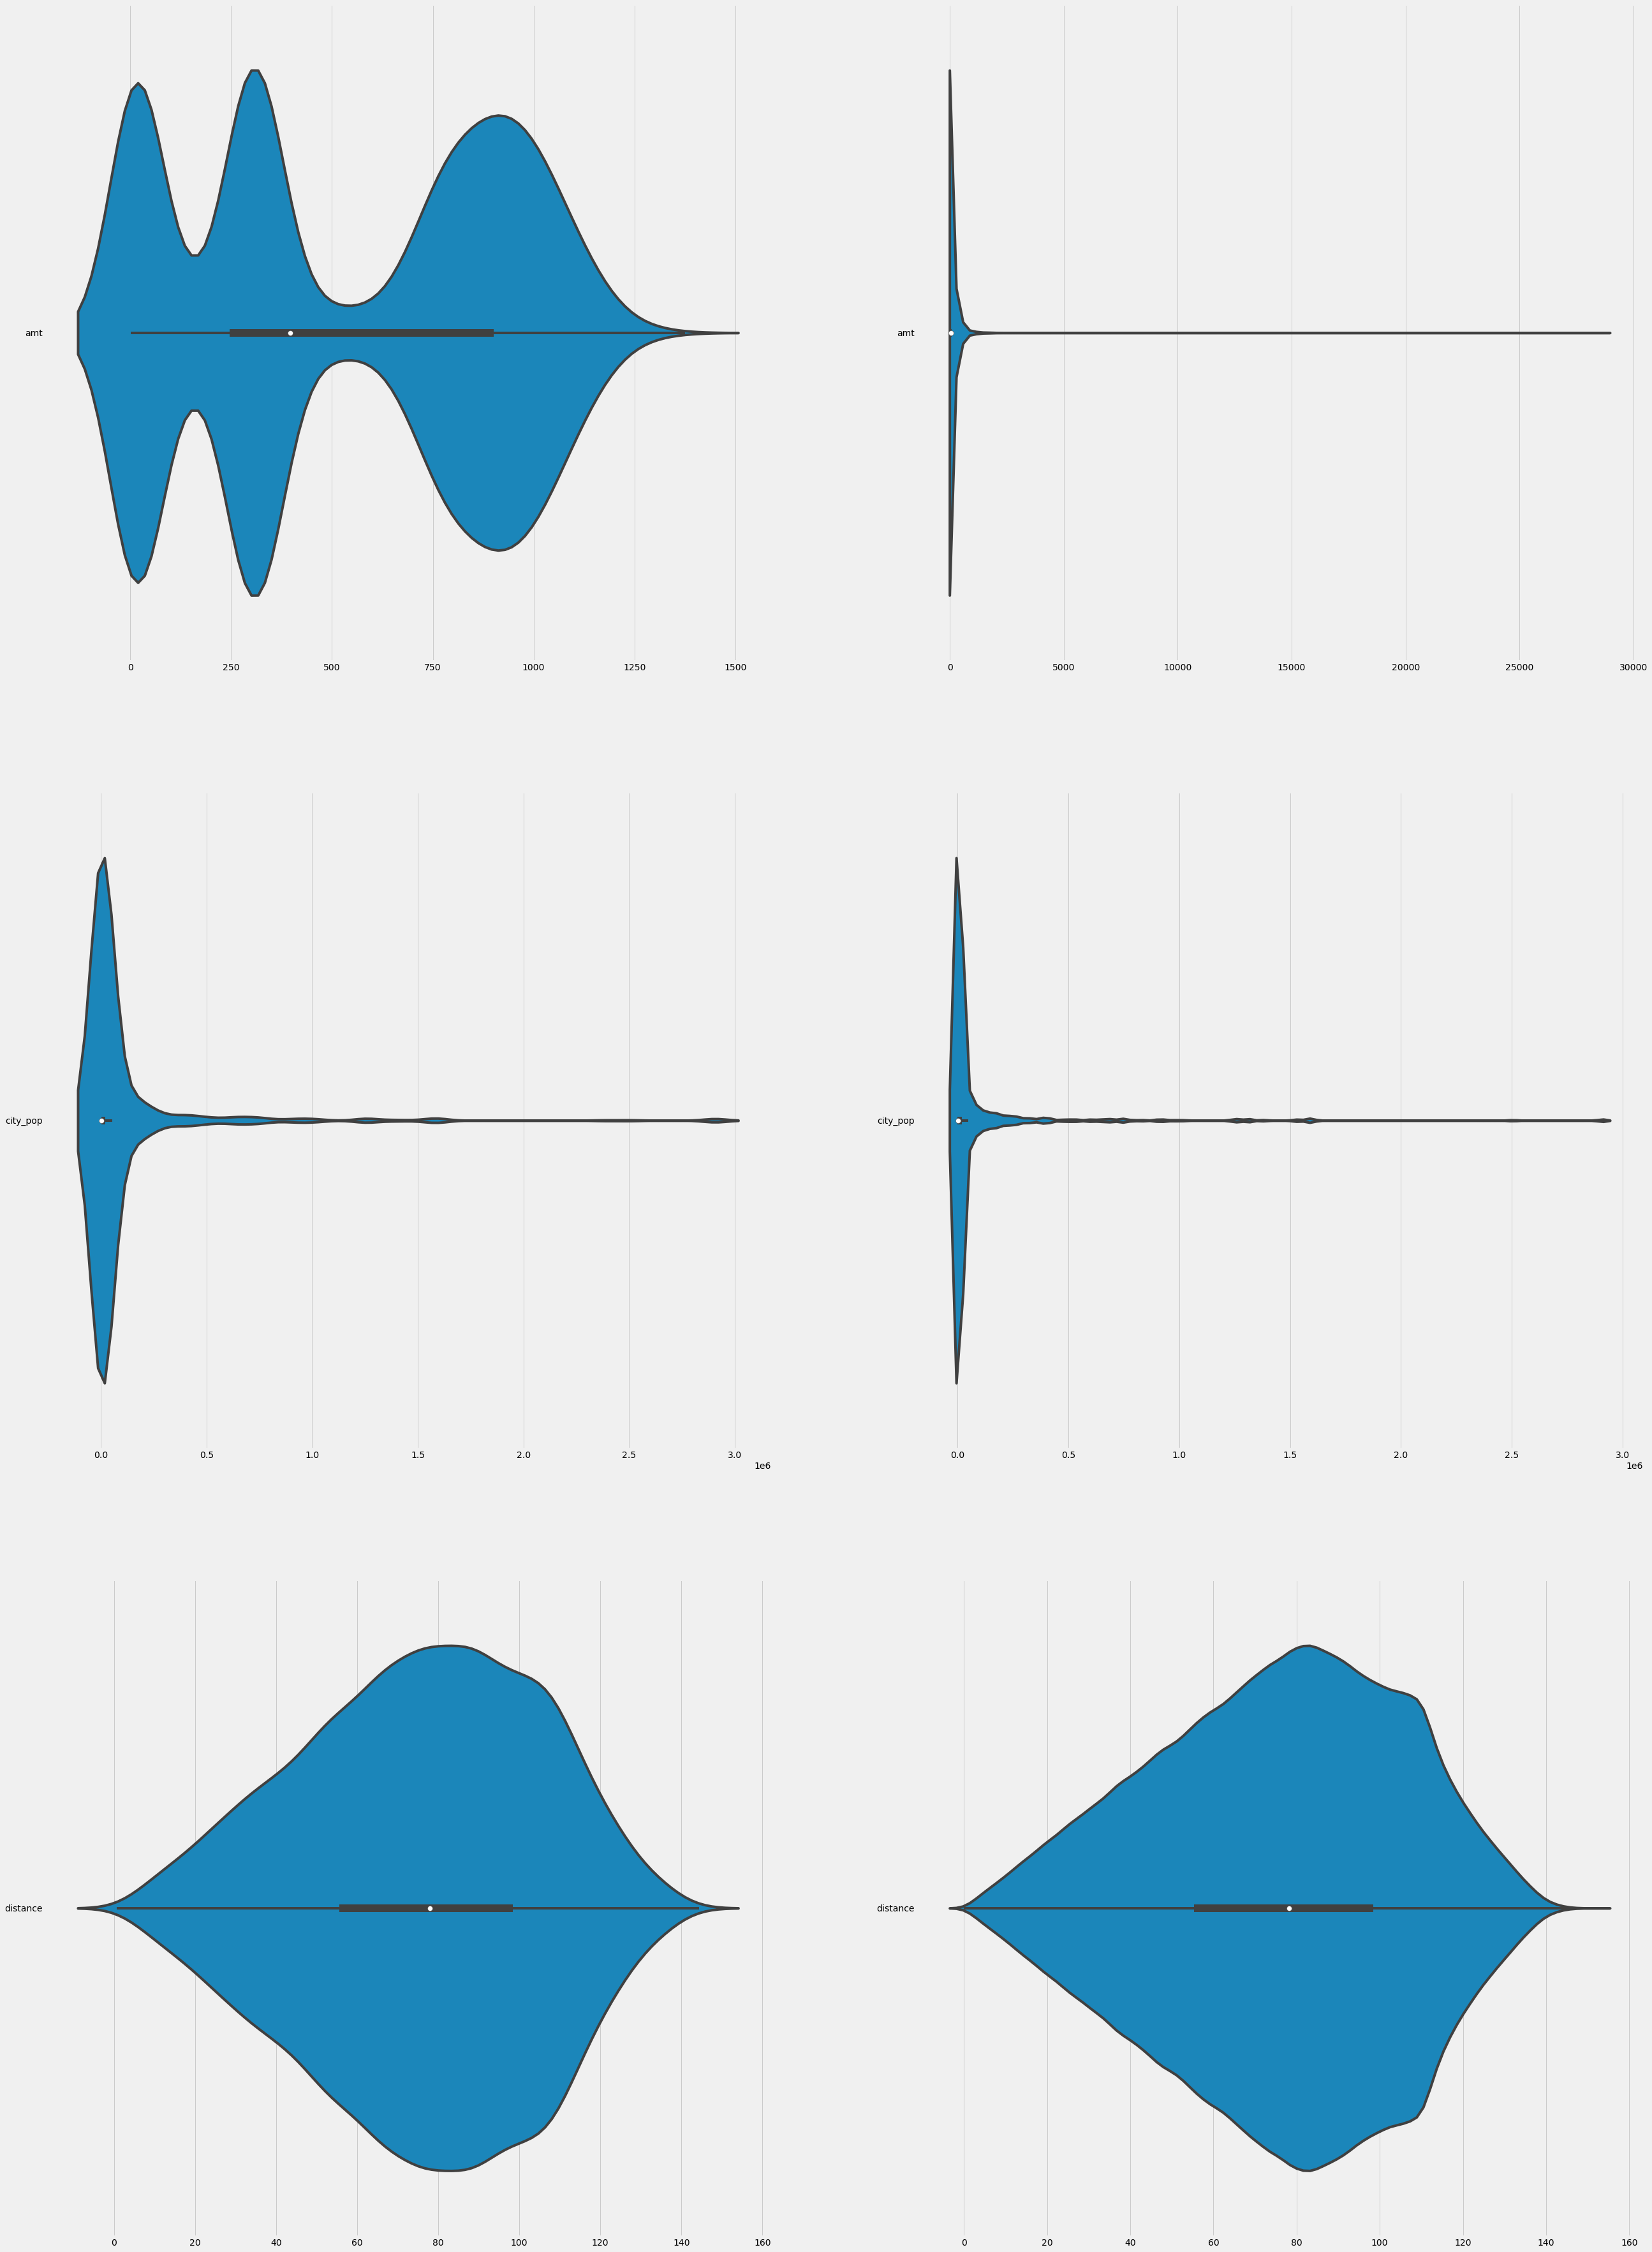

In [14]:
fraudamt = pd.DataFrame(numericalfrauddata['amt'])
fraudcitypop = pd.DataFrame(numericalfrauddata['city_pop'])
frauddist = pd.DataFrame(numericalfrauddata['distance'])
nonfraudamt = pd.DataFrame(numericalnonfrauddata['amt'])
nonfraudcitypop = pd.DataFrame(numericalnonfrauddata['city_pop'])
nonfrauddist = pd.DataFrame(numericalnonfrauddata['distance'])

f, axes = plt.subplots(3,2, figsize=(40, 60))

sb.violinplot(data = fraudamt, orient = "h", ax = axes[0,0])
sb.violinplot(data = fraudcitypop, orient = "h", ax = axes[1,0])
sb.violinplot(data = frauddist, orient = "h", ax = axes[2,0])

sb.violinplot(data = nonfraudamt, orient = "h", ax = axes[0,1])
sb.violinplot(data = nonfraudcitypop, orient = "h", ax = axes[1,1])
sb.violinplot(data = nonfrauddist, orient = "h", ax = axes[2,1])





Fraud cases are on the left while non-fraud cases are on the right. From this, we can see that distance from owner's house to merchant does not really affect whether a case is fraud or not. 
Generally, we can see that city population is slightly higher for fraud. <br> Amount in a transaction seems to have more of an effect on fraud cases. <br> Hence, it makes sense for us to analyse amount further.


<AxesSubplot:>

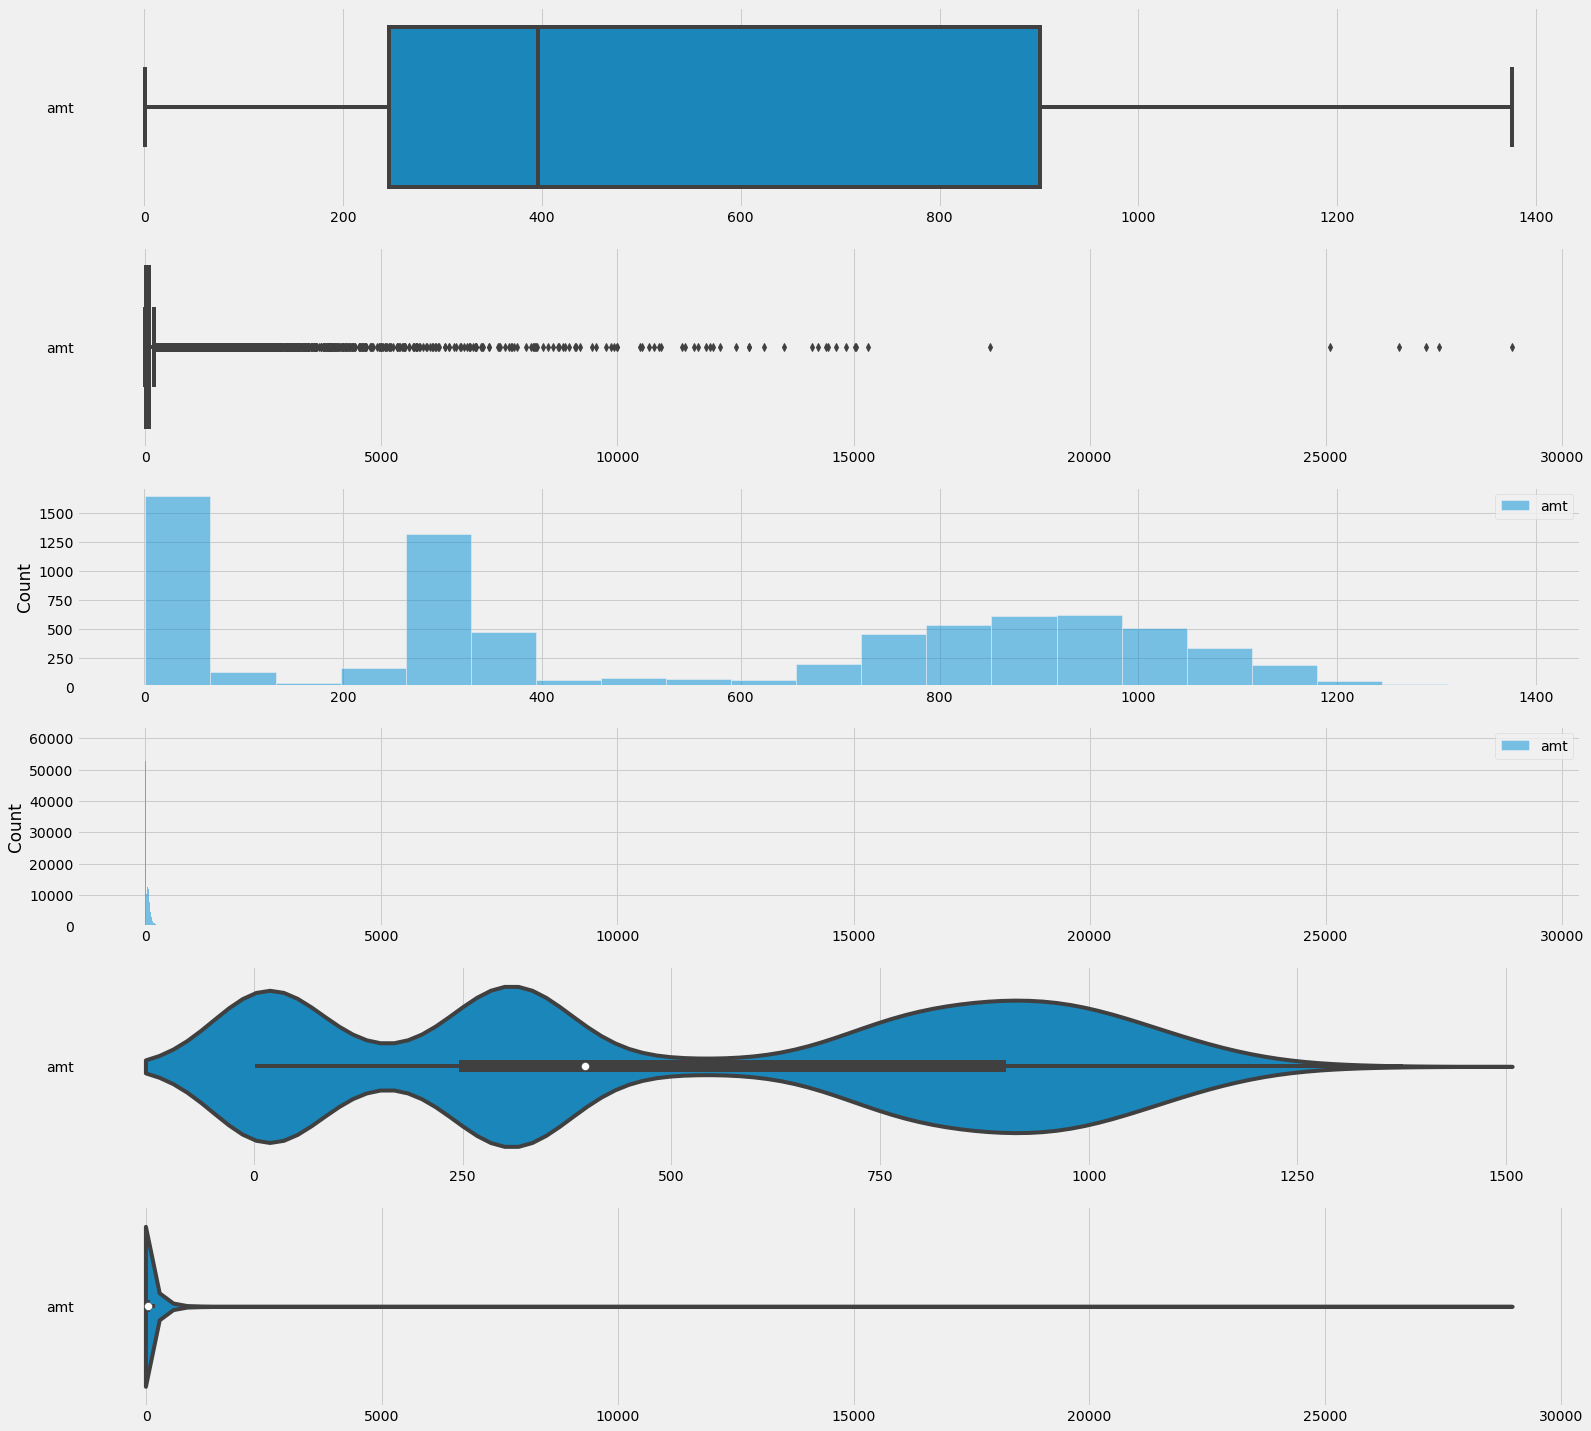

In [15]:
f, axes = plt.subplots(6,figsize=(24, 24))

sb.boxplot(data = fraudamt, orient = "h", ax = axes[0])
sb.histplot(data = fraudamt, ax = axes[2])
sb.violinplot(data = fraudamt, orient = "h", ax = axes[4])


sb.boxplot(data = nonfraudamt, orient = "h", ax = axes[1])
sb.histplot(data = nonfraudamt, ax = axes[3])
sb.violinplot(data = nonfraudamt, orient = "h", ax = axes[5])

### Categorical data
Looking at some categorical data, we will be analysing five categorical variables:
<br> 1) Date and time of the transaction (trans_date_trans_time)
<br> 2) Name of the merchant/store (merchant)
<br> 3) Category of the items purchased from the store (category)
<br> 4) The city of the transaction (city)
<br> 5) The job of the card holder (job)
for fraud cases only. This is because it will be odd to find the number of non-fraud cases in the categorical data as it will not give us any meaningful insights from it. Hence, we will be looking at only the fraud cases. From the above code, we can see that there are a total of 7506 cases of fraud. From there, we want to see out of how many of these cases, say, which merchant has the highest number of fraud cases, which day has the most number of fraud etc.

In [16]:
#Categorical dataframe
catfrauddata = is_frauddata[['trans_date_trans_time', 'merchant','category', 'city', 'job']]
catfrauddata


trans_date_trans_time                              merchant  \
2449      2019-01-02 01:06:37                fraud_Rutherford-Mertz   
2472      2019-01-02 01:47:29      fraud_Jenkins, Hauck and Friesen   
2523      2019-01-02 03:05:23                fraud_Goodwin-Nitzsche   
2546      2019-01-02 03:38:03                fraud_Erdman-Kertzmann   
2553      2019-01-02 03:55:47                    fraud_Koepp-Parker   
...                       ...                                   ...   
1295399   2020-06-21 01:00:08                    fraud_Kassulke PLC   
1295491   2020-06-21 01:53:35                      fraud_Schumm PLC   
1295532   2020-06-21 02:16:56  fraud_Tillman, Dickinson and Labadie   
1295666   2020-06-21 03:26:20                  fraud_Corwin-Collins   
1295733   2020-06-21 03:59:46                   fraud_Koss and Sons   

              category            city                       job  
2449       grocery_pos   Collettsville            Soil scientist  
2472     gas_transport     San Antonio  Horticultural consultant  
2523       grocery_pos     San Antonio  Horticultural consultant  
2546     gas_transport   Collettsville            Soil scientist  
2553       grocery_pos     San Antonio  Horticultural consultant  
...                ...             ...                       ...  
1295399   shopping_net      Vero Beach         Librarian, public  
1295491   shopping_net      Vero Beach         Librarian, public  
1295532  gas_transport  Denham Springs                 Herbalist  
1295666  gas_transport         Notrees            Cytogeneticist  
1295733  gas_transport  Denham Springs                 Herbalist  

[7506 rows x 5 columns]

In [17]:
catfrauddata['merchant'].value_counts()

fraud_Rau and Sons        49
fraud_Cormier LLC         48
fraud_Kozey-Boehm         48
fraud_Doyle Ltd           47
fraud_Vandervort-Funk     47
                          ..
fraud_Kuphal-Toy           1
fraud_Eichmann-Kilback     1
fraud_Lynch-Mohr           1
fraud_Tillman LLC          1
fraud_Hills-Olson          1
Name: merchant, Length: 679, dtype: int64

As there are too many categorical variables with only a small handful of fraud cases, for example, merchant "fraud_Adams-Barrows" with only 1 fraud case, we will isolate the categoricals with at least 24 cases. This is because the dataset given is for the span of two years, from 1st Jan 2019 to 31 Dec 2020. Hence, we will only consider the categoricals that has at least 1 fraud case every month on average.

In [18]:
#Merchants with at least 24 fraud cases

merchantfrauddata = catfrauddata['merchant'].value_counts().rename_axis('merchants').reset_index(name='counts')
merchants = merchantfrauddata[merchantfrauddata['counts']>=24]
merchants

merchants  counts
0                     fraud_Rau and Sons      49
1                      fraud_Cormier LLC      48
2                      fraud_Kozey-Boehm      48
3                        fraud_Doyle Ltd      47
4                  fraud_Vandervort-Funk      47
..                                   ...     ...
102   fraud_Quitzon, Green and Bashirian      25
103   fraud_Tillman, Fritsch and Schmitt      25
104                    fraud_Durgan-Auer      24
105                   fraud_Predovic Inc      24
106  fraud_Kovacek, Dibbert and Ondricka      24

[107 rows x 2 columns]

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),


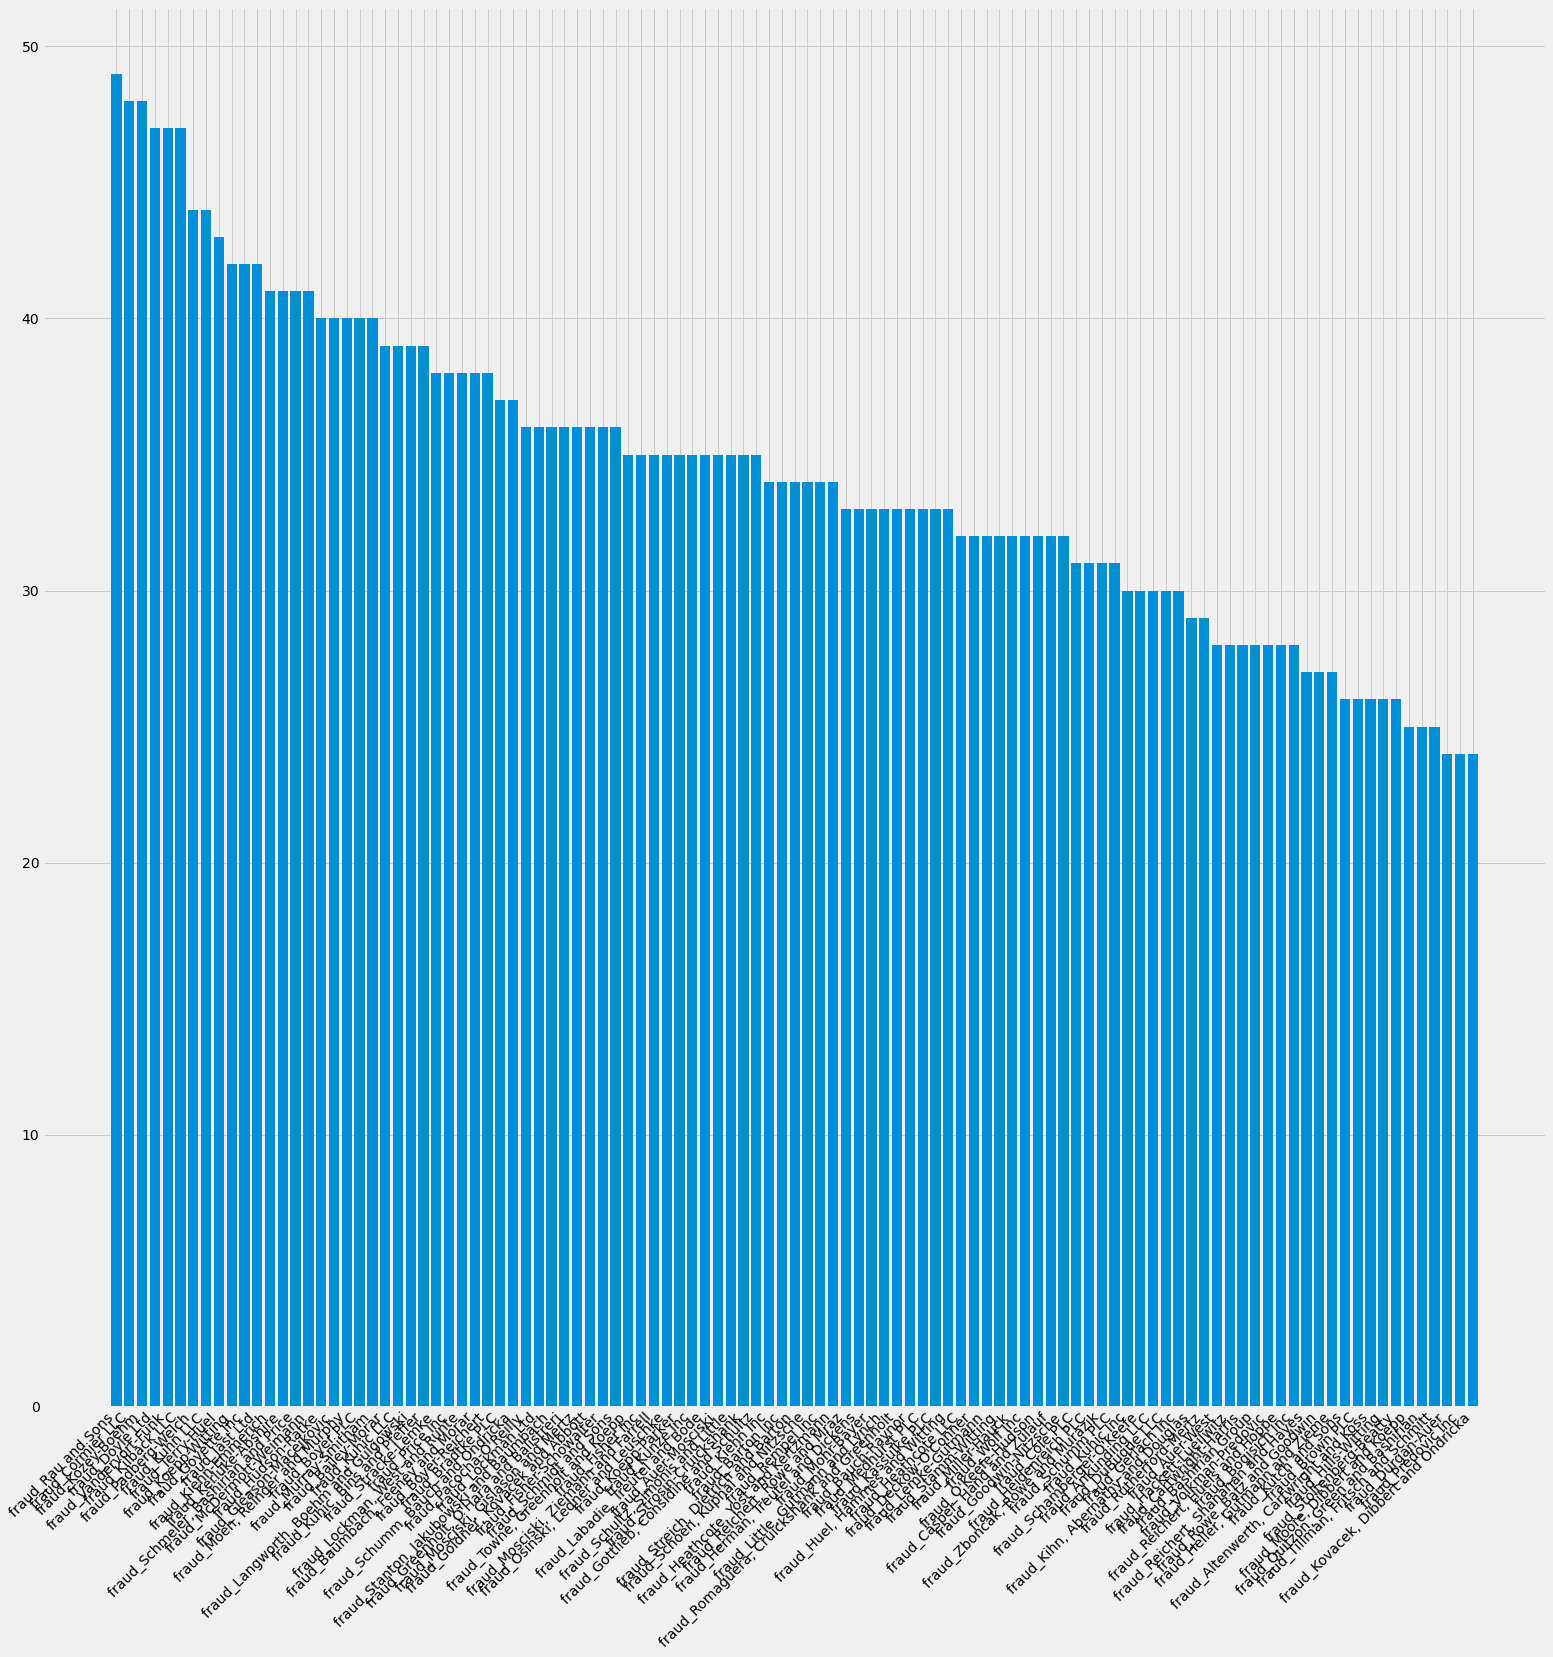

In [19]:
#Histogram of merchants
f,ax = plt.subplots(figsize=(24,24))
plt.bar(merchants['merchants'],merchants['counts'])
plt.xticks(rotation = 45, ha = 'right')

In [20]:
#Categories with fraud cases
catfrauddata["category"].value_counts()

grocery_pos       1743
shopping_net      1713
misc_net           915
shopping_pos       843
gas_transport      618
misc_pos           250
kids_pets          239
entertainment      233
personal_care      220
home               198
food_dining        151
grocery_net        134
health_fitness     133
travel             116
Name: category, dtype: int64

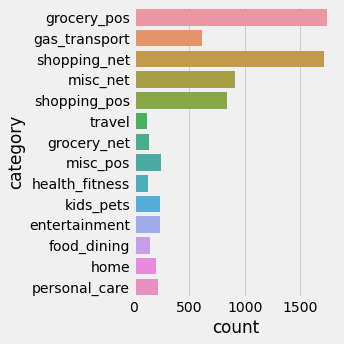

In [29]:
sb.catplot(y = "category", data = catfrauddata ,  kind = "count")

From here, we can see that groceries and shopping has the highest number of fraud cases. Followed by gas and miscelleneous.

In [30]:
#Cities with at least 24 fraud cases
cityfrauddata = catfrauddata['city'].value_counts().rename_axis('cities').reset_index(name='counts')
cities = cityfrauddata[cityfrauddata['counts']>=24]
cities

cities  counts
0        Houston      39
1         Warren      33
2     Huntsville      29
3         Naples      29
4         Dallas      27
5          Tulsa      27
6         Topeka      27
7        Detroit      26
8          Utica      25
9       Randolph      25
10   San Antonio      25
11   Albuquerque      24
12    Clearwater      24
13  Beaver Falls      24

From here, we can see that these 13 cities have at least 24 fraud cases in the span of two years. This means that there is an average of at least 1 fruad case occuring every month at these cities.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

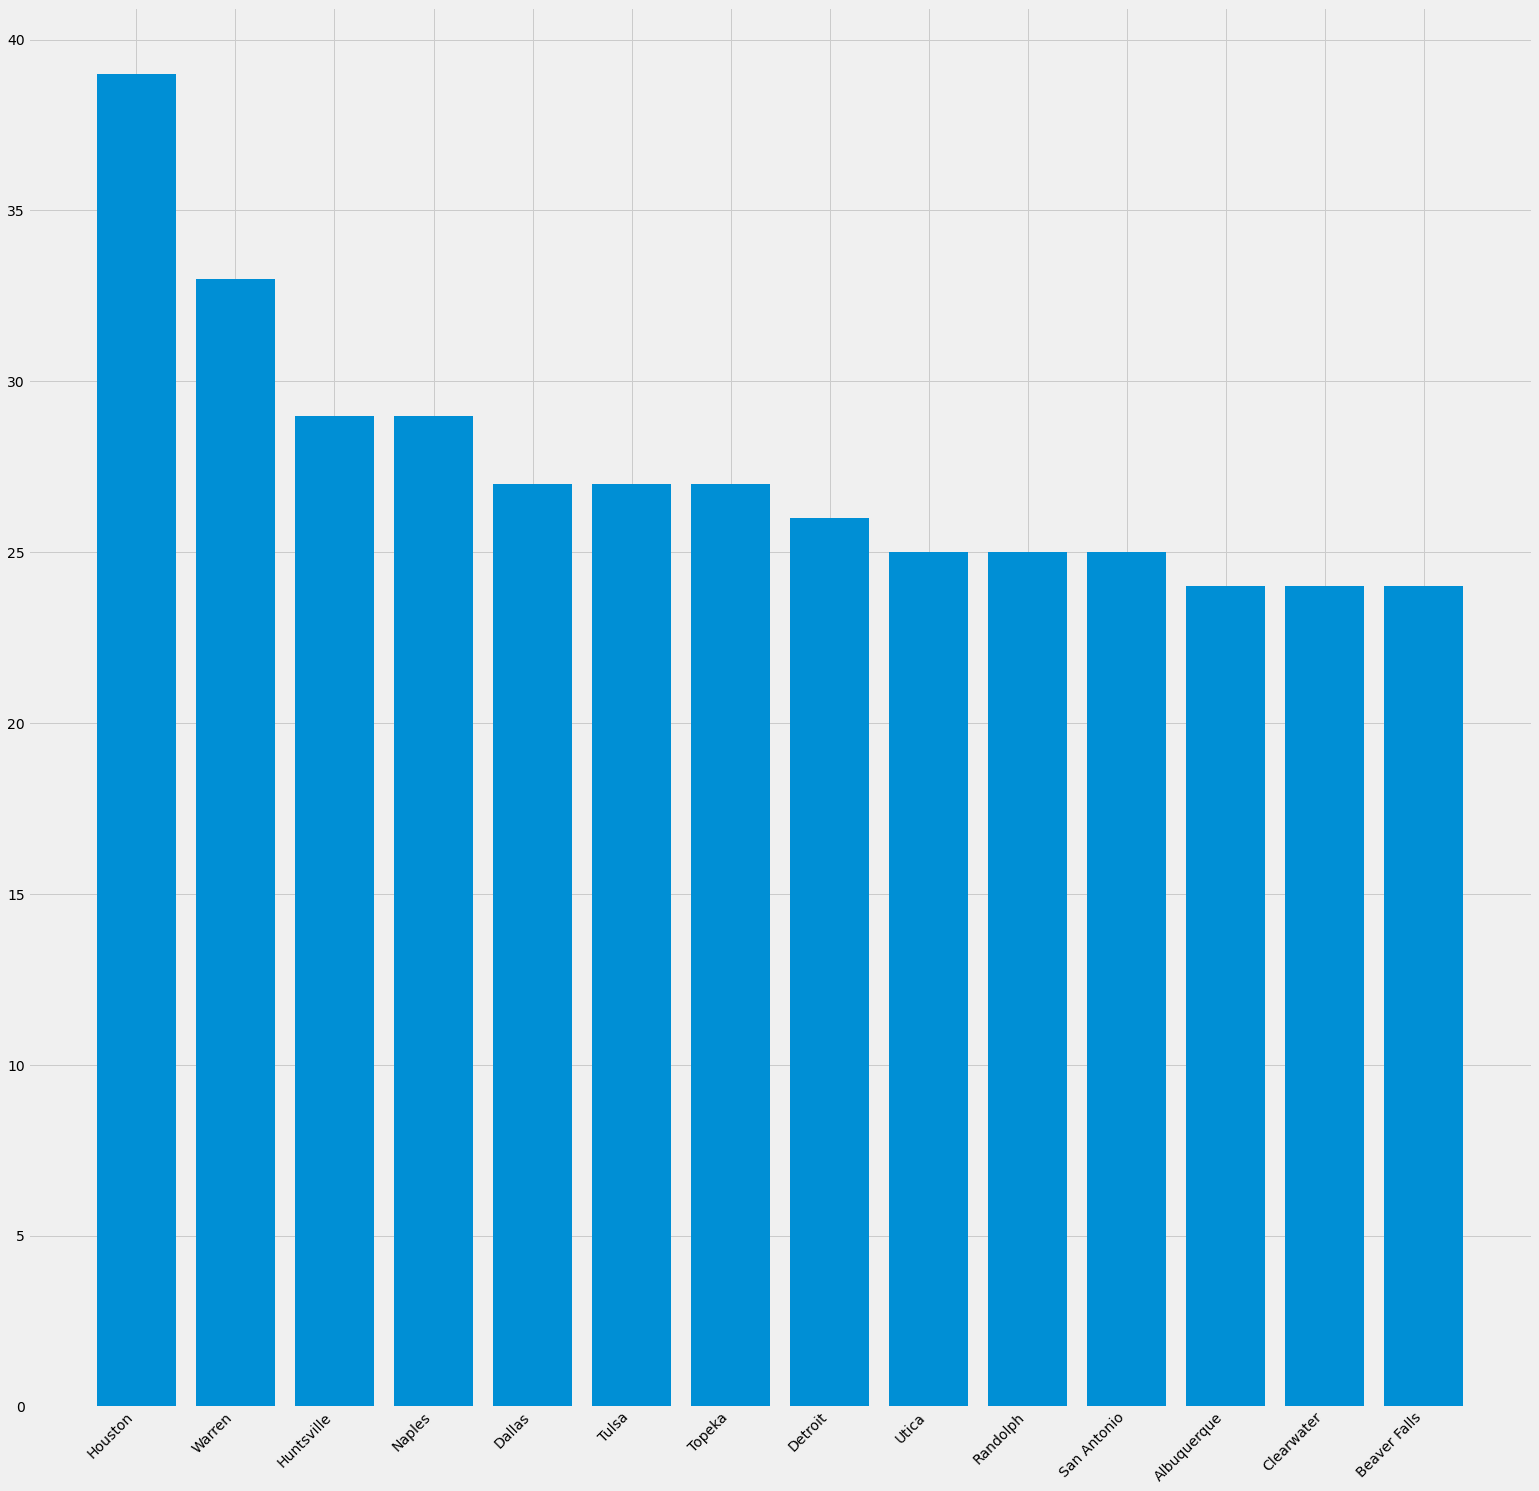

In [31]:
#Histogram plot of cities
f,ax = plt.subplots(figsize=(24,24))
plt.bar(cities['cities'],cities['counts'])
plt.xticks(rotation = 45, ha = 'right')

In [32]:
#Jobs with at least 24 fraud cases
jobfrauddata = catfrauddata['job'].value_counts().rename_axis('jobs').reset_index(name='counts')
jobs = jobfrauddata[jobfrauddata['counts']>=24]
jobs

jobs  counts
0            Materials engineer      62
1     Trading standards officer      56
2               Naval architect      53
3           Exhibition designer      51
4      Surveyor, land/geomatics      50
..                          ...     ...
83  Lecturer, further education      24
84          Colour technologist      24
85         Pharmacist, hospital      24
86            Transport planner      24
87             Network engineer      24

[88 rows x 2 columns]

From here, we can see that these 87 jobs have at least 1 fraud cases occuring every month on average. With Materials engineer facing the highest number of fraud cases.

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, 

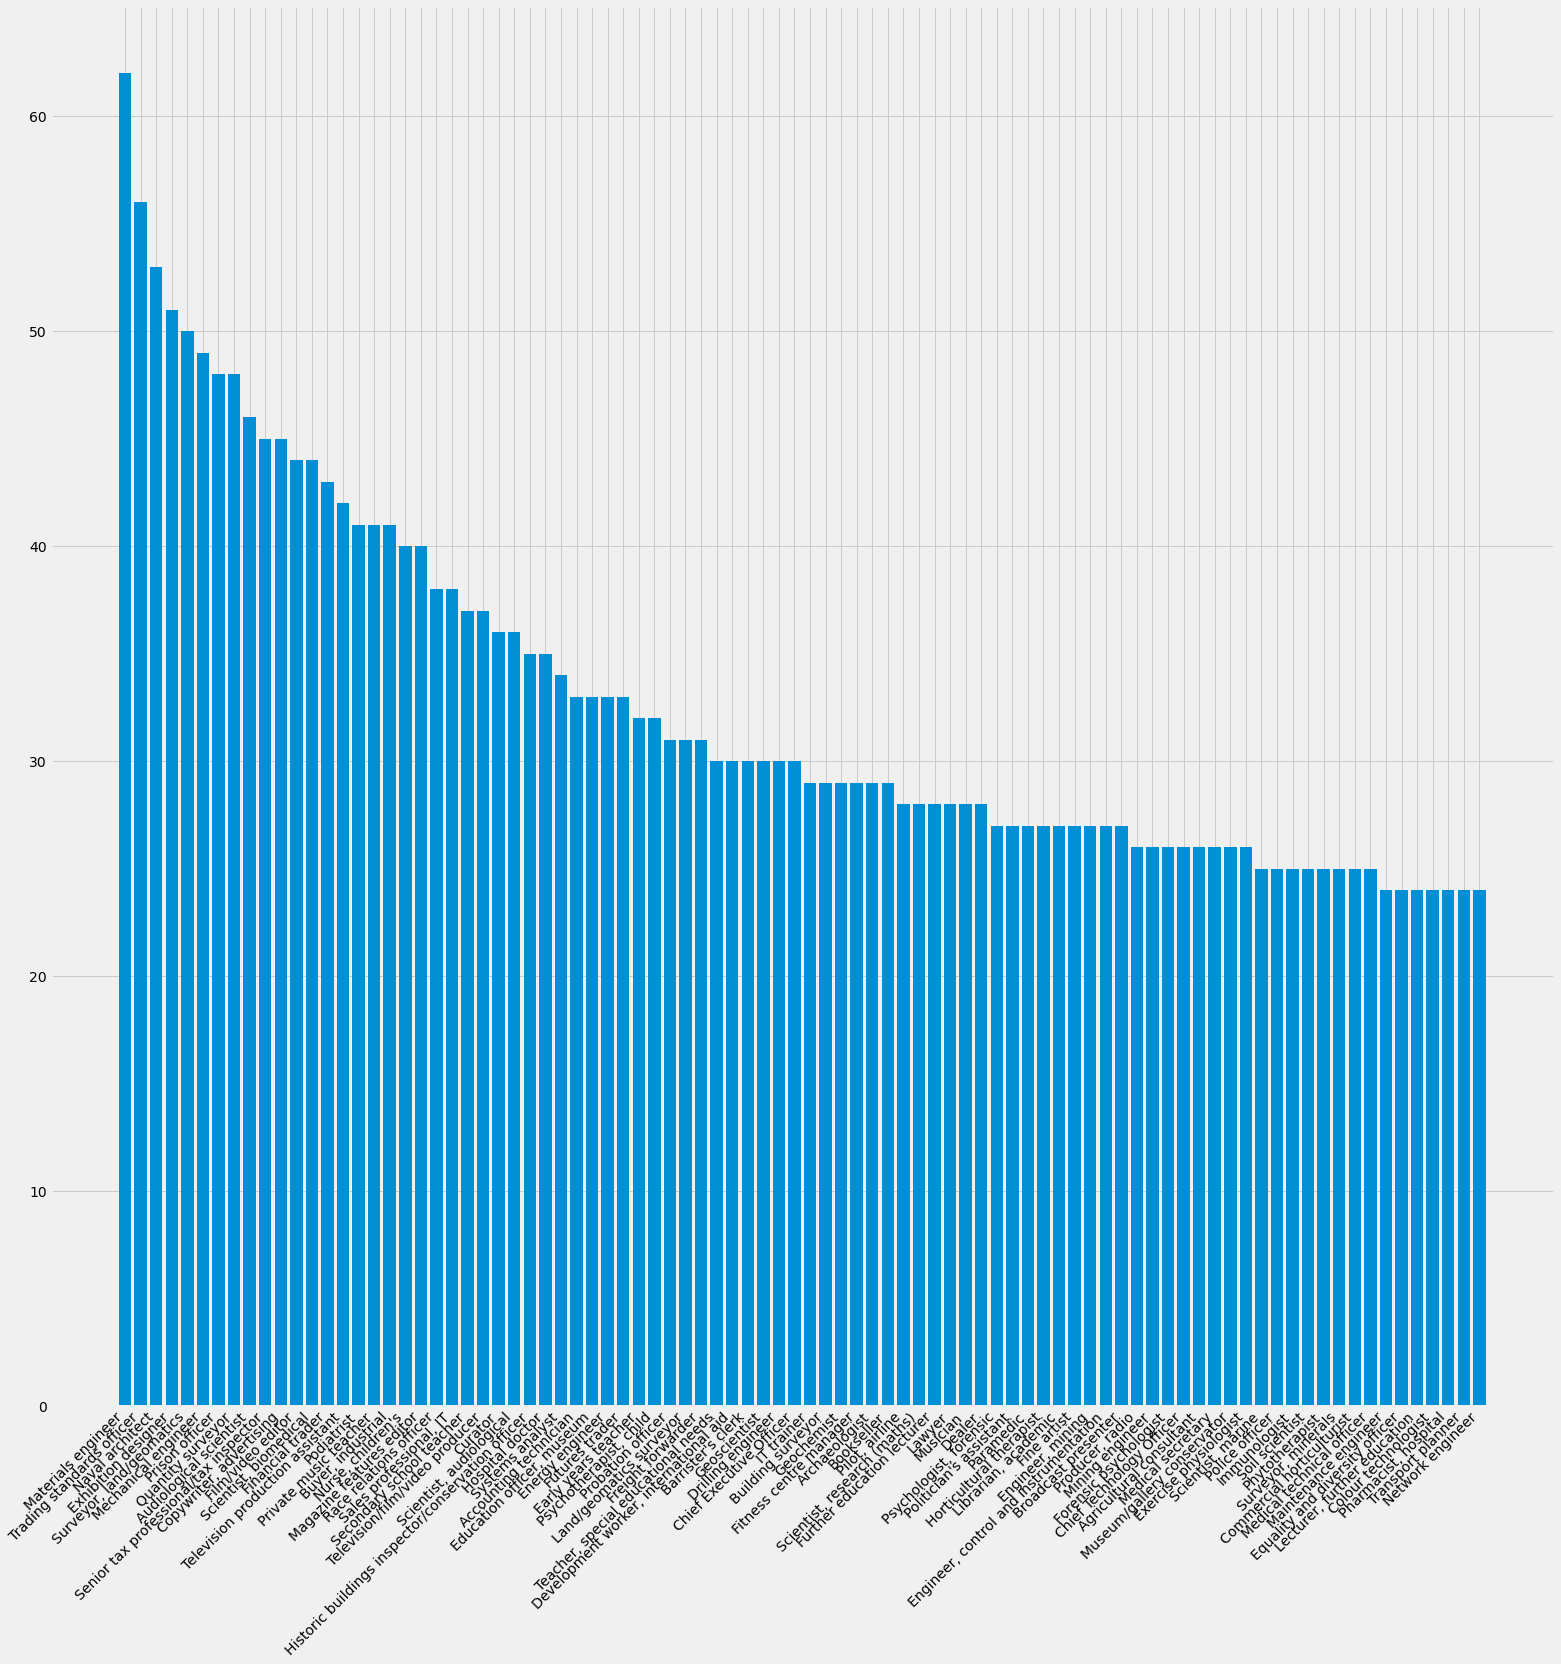

In [35]:
#Histogram plot of jobs
f,ax = plt.subplots(figsize=(24,24))
plt.bar(jobs['jobs'],jobs['counts'])
plt.xticks(rotation = 45, ha = 'right')

Since transactions happen at different dates, we want to convert them into days of the week to see which days are frauds most likely to occur.

In [36]:
#Converting transaction date to day of the week
train_time = pd.DataFrame(catfrauddata[['trans_date_trans_time']])
train_time['trans_date_trans_time'] = pd.to_datetime(train_time['trans_date_trans_time'])
trans_time = pd.DataFrame(train_time)
trans_time.dtypes

trans_time['day'] = trans_time['trans_date_trans_time'].dt.dayofweek
trans_time['day']

def daycalc(a):
    array = ['Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday','Monday']
    return array[a - 1]

trans_time['day_of_week'] = trans_time['day'].apply(daycalc)
trans_time

trans_date_trans_time  day day_of_week
2449      2019-01-02 01:06:37    2   Wednesday
2472      2019-01-02 01:47:29    2   Wednesday
2523      2019-01-02 03:05:23    2   Wednesday
2546      2019-01-02 03:38:03    2   Wednesday
2553      2019-01-02 03:55:47    2   Wednesday
...                       ...  ...         ...
1295399   2020-06-21 01:00:08    6      Sunday
1295491   2020-06-21 01:53:35    6      Sunday
1295532   2020-06-21 02:16:56    6      Sunday
1295666   2020-06-21 03:26:20    6      Sunday
1295733   2020-06-21 03:59:46    6      Sunday

[7506 rows x 3 columns]

In [37]:
timefrauddata = trans_time['day_of_week'].value_counts().rename_axis('day_of_week').reset_index(name='counts')

timefrauddata

day_of_week  counts
0    Saturday    1227
1      Sunday    1216
2      Monday    1182
3      Friday    1079
4    Thursday    1008
5     Tuesday     935
6   Wednesday     859

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

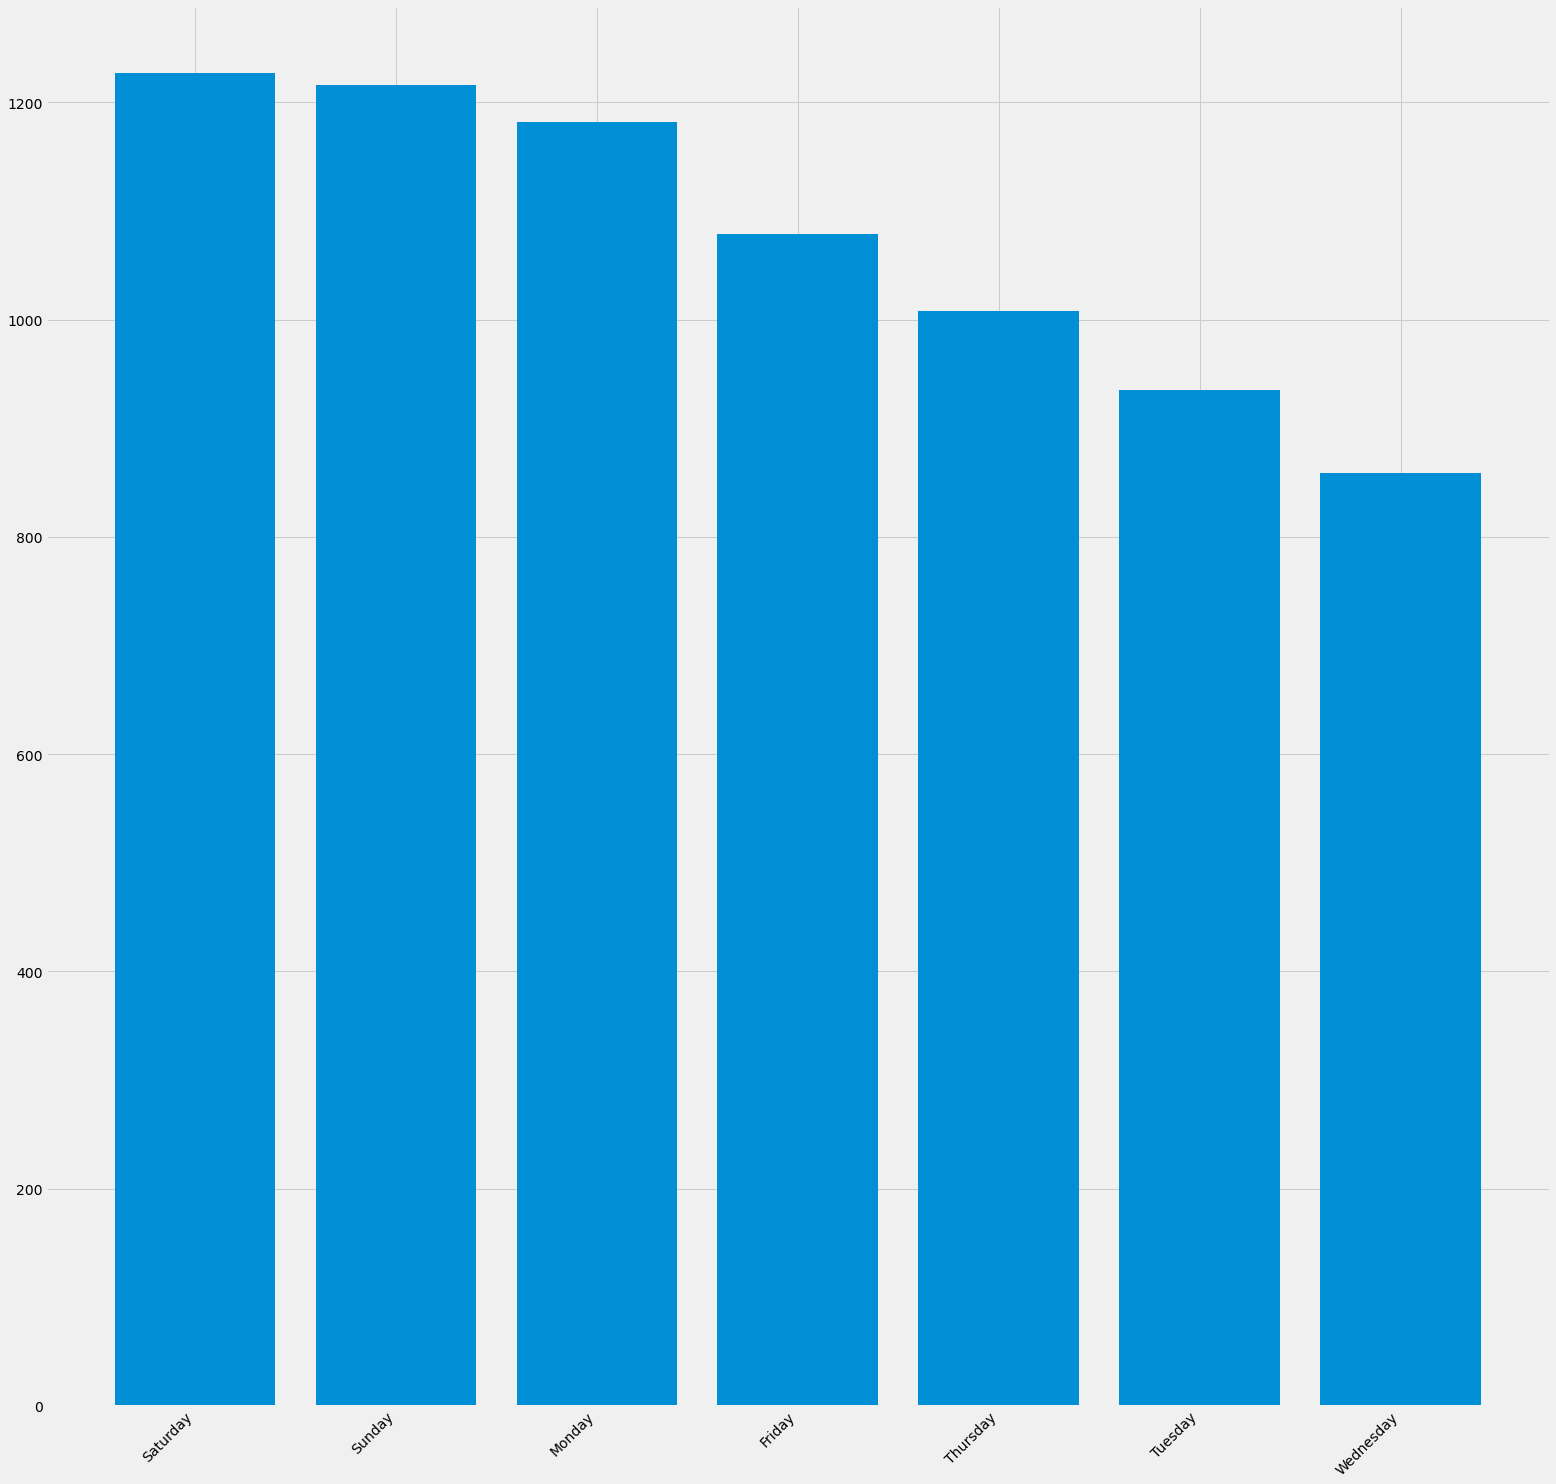

In [38]:
#Histogram plot of days of the week
f,ax = plt.subplots(figsize=(24,24))
plt.bar(timefrauddata['day_of_week'],timefrauddata['counts'])
plt.xticks(rotation = 45, ha = 'right')

From here, we can see that frauds generally occur on the weekends. We can also see that most frauds happen during the end and start of the week. With the least frauds occuring in the middle of the week.